FUNDAMENTAÇAO BASICA : random forest é um algoritmo de aprendizagem de máquina flexível e fácil de usar que produz excelentes resultados a maioria das vezes, mesmo sem ajuste de hiperparâmetros. É também um dos algoritmos mais utilizados, devido à sua simplicidade e o fato de que pode ser utilizado para tarefas de classificação e também de regressão.

TIPO DE CLASSIFICAÇÃO:  metodo utilizado é o de bagging, a combinaçao dos modelos de aprendizado aumenta o resultado geral. 

In [0]:
#Importando biblioteca de conjuntos de dados de scikit-learn.
from sklearn import datasets

#Load dataset
iris = datasets.load_iris()

In [4]:
#Impressao das especies dos rotulos ( setosa, versicolor, virginica)
print(iris.target_names)

# imprime os nomes dos quatros recursos
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
# imprime os dados da iris ( 5 principais registros)
print(iris.data[0:5])

# imprime as etiquetas da iris (0: setosa; 1: versicolor, 2: virginica)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
#criando um dataframe de determinado conjunto de dados  da iris
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [0]:
#importa funçao train_test_split
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

#dividir conjunto de dados em conjuntos de treinamento e conjunto de teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [0]:
#importar modelo aleatorio de floresta
from sklearn.ensemble import RandomForestClassifier

#criar um classificador gaussiano
clf=RandomForestClassifier(n_estimators=100)

#treine o modelo usando os conjuntos de treinamentos y_pred = clf.predict (x_teste)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [10]:
#importar modulo de métricas do scikit-learn para calculo de precisao
from sklearn import metrics
#precisao do modelo, com que frequencia o classificador esta correto?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9111111111111111


In [11]:
species_idx = clf.predict([[3, 5, 4, 2]])[0]
iris.target_names[species_idx]

'virginica'

In [12]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.499290
petal length (cm)    0.406081
sepal length (cm)    0.081800
sepal width (cm)     0.012830
dtype: float64

No handles with labels found to put in legend.


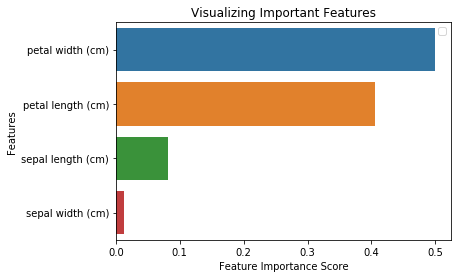

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#criando um grafico de barras 
sns.barplot(x=feature_imp, y=feature_imp.index)

#adicione marcadores ao seu grafico
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()